In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [14]:
def history_plot(fit_history, n):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_loss'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['accuracy'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_accuracy'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")    
    plt.legend()
    plt.title('Accuracy');

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

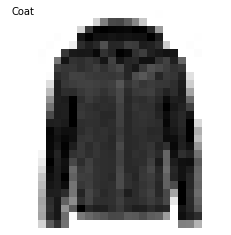

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.text(0, 0, class_names[y_train[0]])
plt.show()

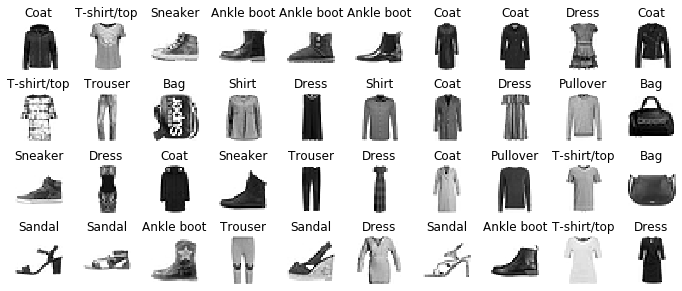

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 45us/sample - loss: 0.7193 - accuracy: 0.7634 - val_loss: 0.5927 - val_accuracy: 0.7884
Epoch 2/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4918 - accuracy: 0.8269 - val_loss: 0.4527 - val_accuracy: 0.8432
Epoch 3/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.4442 - accuracy: 0.8445 - val_loss: 0.4111 - val_accuracy: 0.8600
Epoch 4/30
55000/55000 [==============================] - 2s 39us/sample - loss: 0.4166 - accuracy: 0.8534 - val_loss: 0.3954 - val_accuracy: 0.8622
Epoch 5/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3962 - accuracy: 0.8608 - val_loss: 0.4520 - val_accuracy: 0.8352
Epoch 6/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.3811 - accuracy: 0.8655 - val_loss: 0.4013 - val_accuracy: 0.8560
Epoch 7/30
55000/55000 [==============================] -

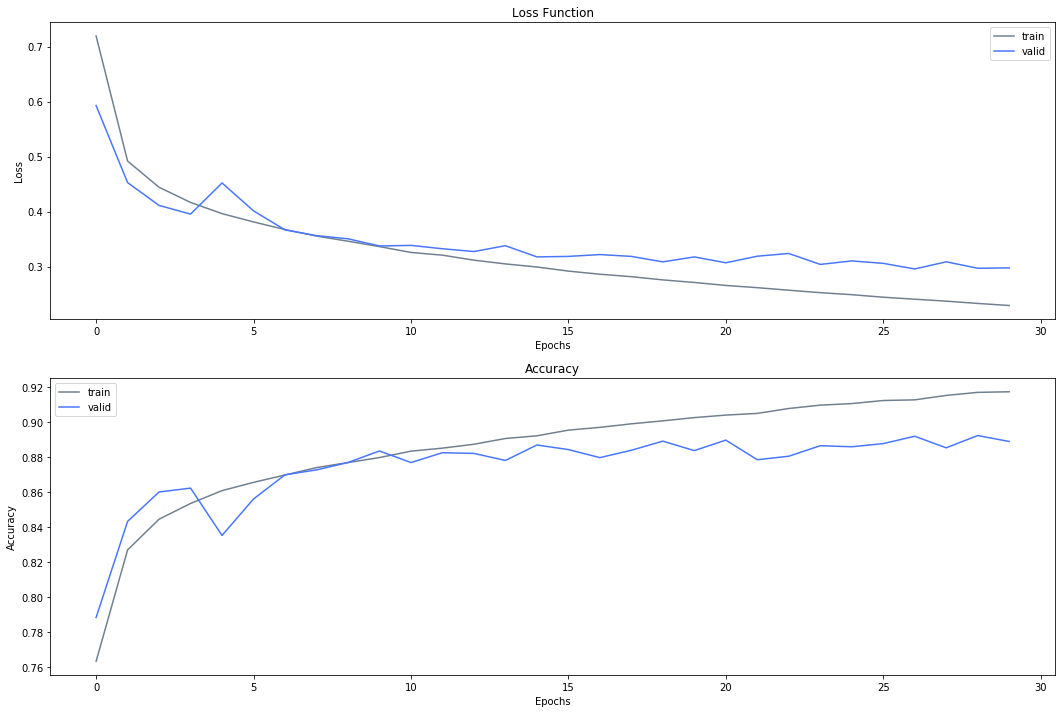

In [15]:
history_plot(history, 0)

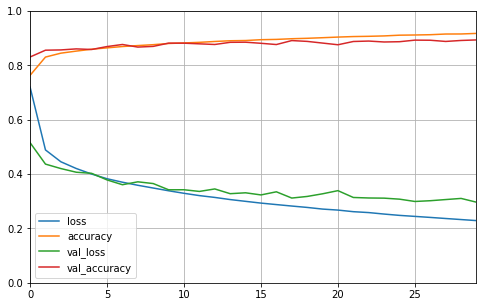

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

hasn't quite converged yet! let's continue training for another 10 epochs. 

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2259 - accuracy: 0.9178 - val_loss: 0.2958 - val_accuracy: 0.8962
Epoch 2/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2216 - accuracy: 0.9195 - val_loss: 0.2984 - val_accuracy: 0.8940
Epoch 3/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2174 - accuracy: 0.9220 - val_loss: 0.3045 - val_accuracy: 0.8900
Epoch 4/10
55000/55000 [==============================] - 2s 40us/sample - loss: 0.2155 - accuracy: 0.9225 - val_loss: 0.2930 - val_accuracy: 0.8944
Epoch 5/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.2104 - accuracy: 0.9247 - val_loss: 0.3137 - val_accuracy: 0.8876
Epoch 6/10
55000/55000 [==============================] - 2s 39us/sample - loss: 0.2079 - accuracy: 0.9259 - val_loss: 0.3309 - val_accuracy: 0.8878
Epoch 7/10
55000/55000 [==============================] -

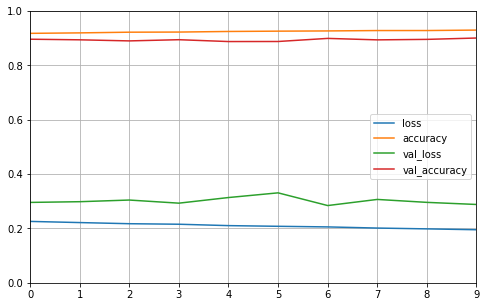

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/sample - loss: 63.8016 - accuracy: 0.8521


[63.80156967315674, 0.8521]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [18]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

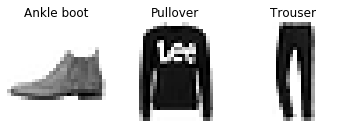

In [19]:
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model.save("keras_models/01_classifier_model.h5")